# TP 1 : FC & CNN

**Il est interdit d'utiliser la fonction 'compile' de TensorFlow pour ce TP**

Veillez à commenter votre code, vous pouvez aussi ajouter des cellules de markdown dans lesquelles vous expliquez vos raisonnements et les raisons de vos choix.
Ces commentaires seront pris en compte pour l'évaluation du travail.

Le but de ce TP sera de vous familiariser avec l'utilisation de TensorFlow et Keras pour la création et l'entraînement de modèles fully-connected puis à convolutions simples.
Vous entraînerez des modèles sur une tâche de classification sur les jeux de données MNIST.
Ces jeux de données sont composés d'images de dimensions 28x28 et ont l'avantage d'être très simples d'utilisation ainsi que de permettre un apprentissage rapide.

Nous allons utiliser la librairie TensorFlow et faire tourner notre code sous Google Colab pour nos TP, ce qui aura l'avantage de nous permettre d'utiliser les GPUs mis à disposition gratuitement par Google.
Vous êtes libre d'utiliser une autre librairie que TensorFlow si vous en maîtrisez une autre ou votre machine personnelle si celle-ci possède un GPU suffisant, mais il est probable que les phases d'entraînement soit plus rapides sous Colab.

N'hésitez pas à vous référer aux docs de TensorFlow 2 et Keras disponibles sur internet lors de ce TP.

Ce TP s'effectue individuellement ou en binome.
Veuillez respecter les consignes suivantes pour le rendu de votre travail :

*   Renommez le selon le format suivant : "DL_2023_TP_CNN_prenom1_nom1_prenom2_nom2.ipynb".
*   Veillez à ce que vos noms et prénoms soient complétés dans la cellule ci-dessous.
*   Veillez à avoir bien exécuté toutes les cellules de code et que les résultats soient tous bien visible dans le notebook sans nécessiter une ré-exécution.
*   Partagez le notebook avec ranvier.thomas.pro@gmail.com.

Si vous avez effectué le TP autrement que sur Google Colab :

*   Renommez le selon le format suivant : "DL_2023_TP_CNN_prenom1_nom1_prenom2_nom2.ipynb".
*   Téléchargez le fichier ipynb.
*   Envoyez le fichier en pièce-jointe à ranvier.thomas.pro@gmail.com, en indiquant en tant qu'objet : "TP CNN prenom1 nom1 prenom2 nom2".
---

## Veuillez compléter vos noms et prénoms ci-dessous :

*   **Prenom 1** : ...
*   **Nom 1** : ...
*   **Prenom 2** : ...
*   **Nom 2** : ...

In [1]:
import tensorflow as tf

# Si vous obtenez une erreur à ce niveau veuillez suivre ces indications :
# "Modifier" > "Paramètres du notebook" > "Accélérateur matériel" > "GPU"
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print(f'Found GPU: {device_name}')

Found GPU: /device:GPU:0


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

---
# Preparation des données MNIST

Vous allez utiliser le jeu de données MNIST qui contient des chiffres ayant été écrit à la main, le but va être de créer des réseaux de neurones qui vont apprendre à reconnaître et correctement classifier ces chiffres.

In [3]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Il est important de toujours normaliser les données entre 0 et 1 pour qu'un réseau de neurones soit capable de les traiter convenablement.

Normalisez les données entre 0 et 1

In [4]:
# Normalize data
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

Ajoutez une dimension vide supplémentaire aux données, elle correspond à la dimension des channels nécessaire pour les opérations de convolutions.

Par exemple, les dimensions de x_train sont (60000, 28, 28), elles doivent devenir (60000, 28, 28, 1)

In [5]:
import numpy as np

In [6]:
# Add channel dimension
x_train_dim4 = np.expand_dims(x_train_scaled, axis=-1)
x_test_dim4 = np.expand_dims(x_test_scaled, axis=-1)

In [7]:
print(x_train_dim4.shape)
print(x_test_dim4.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Séparez le jeu de données d'entraînement en un jeu de validation de taille 10000 et un nouveau jeu d'entraînement de taille 50000.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Split train val
x_train, x_val, y_train, y_val = train_test_split(x_train_dim4, y_train, train_size=50000, test_size=10000)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(50000, 28, 28, 1)
(50000,)
(10000, 28, 28, 1)
(10000,)


Si les traîtements effectués ci-dessus sur les données sont corrects l'execution de la cellule de code suivante devrait vous afficher les 25 premières images d'entraînement associées à leurs labels.

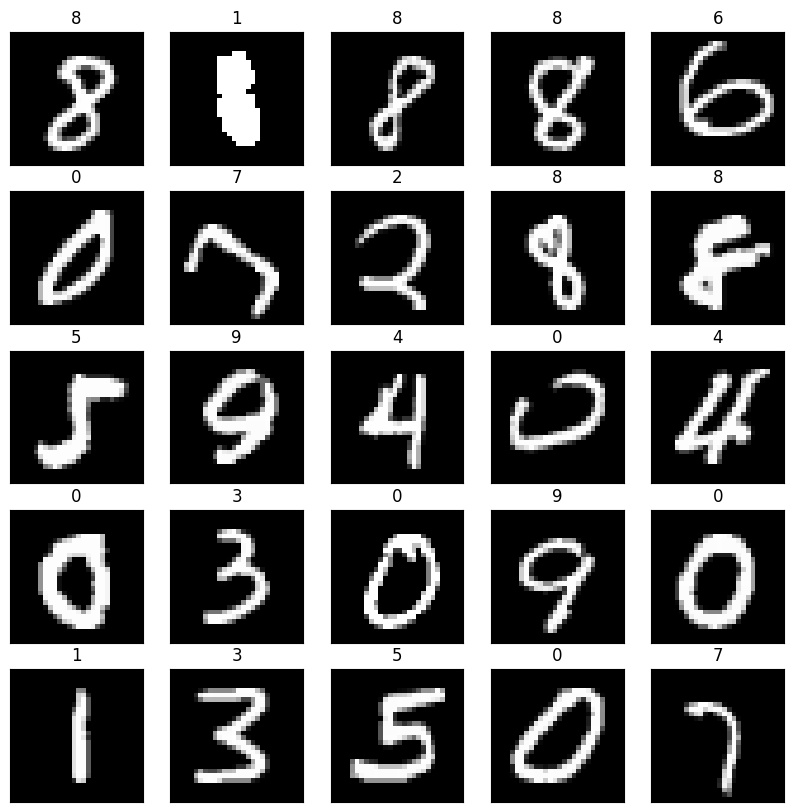

In [11]:
# Plot grid with first 25 training images with their corresponding label
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(y_train[i])
plt.show()

---
# Entraîner un modèle fully-connected sur les données MNIST

Il faut maintenant définir un modèle fully-connected, l'entrainer sur le jeu d'entraînement et évaluer ses performances en terme d'accuracy (https://keras.io/api/metrics/accuracy_metrics/) sur le jeu de test.
Il faudra chercher la meilleure architecture et les meilleurs paramètres possibles de manière empirique en testant différentes valeurs pour chaque.
Avec de bons paramètres vous devriez pouvoir atteindre une accuracy d'au minimum 96% sur le jeu de test.
Reportez vous à la documentation Keras https://keras.io/api/ pour prendre connaissance des différentes fonctionnalités utilisables ainsi que les paramètres qu'il est possible de modifier pour chaque.

Objectifs principaux :
- Définir une architecture et des hyper-paramètres adaptés
- Obtenir 96% d'accuracy sur le jeu de test

Objectifs secondaires :
- Entraînement en mini-batches
- Suivi de l'évolution de la loss et de l'accuracy sur le jeu d'entrainement sur un graph
- Suivi de l'évolution de la loss et de l'accuracy sur le jeu de validation sur un graph

Epoch 1/50, Train Loss: 1.350158452987671, Train Accuracy: 0.667900025844574, Validation Loss: 0.6893857717514038, Validation Accuracy: 0.8317000269889832
Epoch 2/50, Train Loss: 0.518783450126648, Train Accuracy: 0.8671200275421143, Validation Loss: 0.41391992568969727, Validation Accuracy: 0.8881000280380249
Epoch 3/50, Train Loss: 0.37001219391822815, Train Accuracy: 0.898859977722168, Validation Loss: 0.3377871513366699, Validation Accuracy: 0.907800018787384
Epoch 4/50, Train Loss: 0.3143020570278168, Train Accuracy: 0.9137600064277649, Validation Loss: 0.29952186346054077, Validation Accuracy: 0.9175000190734863
Epoch 5/50, Train Loss: 0.2810148596763611, Train Accuracy: 0.9223200082778931, Validation Loss: 0.2739764153957367, Validation Accuracy: 0.925000011920929
Epoch 6/50, Train Loss: 0.256651371717453, Train Accuracy: 0.9287999868392944, Validation Loss: 0.2541276514530182, Validation Accuracy: 0.9315000176429749
Epoch 7/50, Train Loss: 0.23691566288471222, Train Accuracy: 0

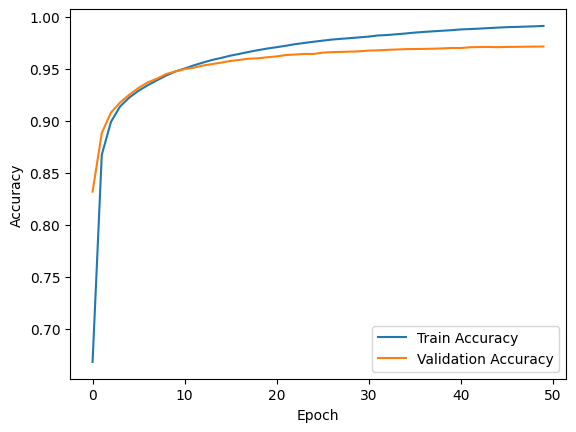

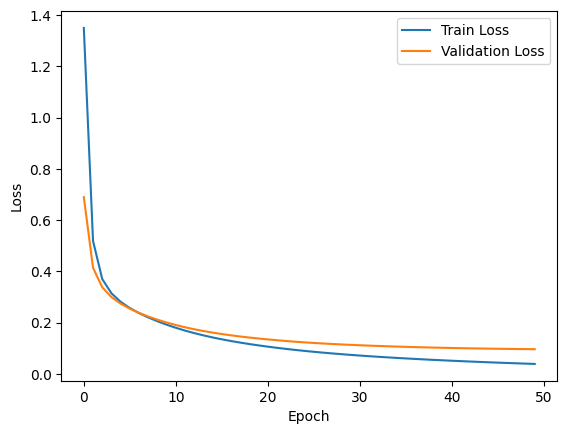

In [12]:
# Define model, for a fully-connected network the input must be properly adapted
model = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units=128 , activation = 'relu'),
            tf.keras.layers.Dense(units=10 , activation = 'softmax')
        ])

# Set hyperparameters
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
epochs = 50
split_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(2500) # Séparer les données x en un nombre fixé de mini−batches

# Initialisation des listes pour le suivi de l'évolution
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training here
for epoch in range(epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  for x_batch, y_batch in split_ds:
    with tf.GradientTape() as tape:
      predictions = model(x_batch) #propage les donnees dans le model pour obtenir des predictions
      loss = loss_function(y_batch, predictions) # Calcul de la loss entre les targets y et les prédictions obtenues

    gradients = tape.gradient(loss, model.trainable_variables) # Calcul automatique du gradient par TensorFlow sur les paramètres du modèle (model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables)) # Mise à jour des paramètres en utilisant l’algorithme d’optimisation (backward propagation)

    # Suivi de l'évolution sur le jeu d'entraînement
    epoch_loss_avg.update_state(loss)
    epoch_accuracy.update_state(y_batch, predictions)

  # Mise a jour des listes sur le jeu d'entrainement
  train_losses.append(epoch_loss_avg.result().numpy())
  train_accuracies.append(epoch_accuracy.result().numpy())

  # Évaluation sur le jeu de validation
  val_predictions = model(x_val)
  val_loss = loss_function(y_val, val_predictions)
  val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()(y_val, val_predictions)

  # Mise a jour des listes sur le jeu de validation
  val_losses.append(val_loss.numpy())
  val_accuracies.append(val_accuracy.numpy())

  print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]}, Train Accuracy: {train_accuracies[-1]}, Validation Loss: {val_losses[-1]}, Validation Accuracy: {val_accuracies[-1]}")


# Plot training history
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
test_predictions = model(x_val)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()(y_val, test_predictions)

In [14]:
test_accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.9713>

---
# Entraîner un modèle à convolutions sur les données MNIST

Il faut maintenant définir un modèles à convolutions, l'entrainer sur le jeu d'entraînement et évaluer ses performances sur le jeu de test.
Il faudra chercher la meilleure architecture et les meilleurs paramètres possibles de manière empirique en testant différentes valeurs pour chaque.
Avec de bons paramètres vous devriez pouvoir atteindre une accuracy d'au minimum 98% sur le jeu de test.

Objectifs principaux :
- Définir une architecture et des hyper-paramètres adaptés
- Obtenir 98% d'accuracy sur le jeu de test

Objectifs secondaires :
- Entraînement en mini-batches
- Suivi de l'évolution de la loss et de l'accuracy sur le jeu d'entrainement sur un graph
- Suivi de l'évolution de la loss et de l'accuracy sur le jeu de validation sur un graph
- Utilisation de batch-normalizations
- Utilisation d'un dropout

Epoch 1/50, Train Loss: 0.9433363080024719, Train Accuracy: 0.7684000134468079, Validation Loss: 0.3641205430030823, Validation Accuracy: 0.8903999924659729
Epoch 2/50, Train Loss: 0.3081255555152893, Train Accuracy: 0.9087399840354919, Validation Loss: 0.26330098509788513, Validation Accuracy: 0.9211999773979187
Epoch 3/50, Train Loss: 0.22801730036735535, Train Accuracy: 0.9327399730682373, Validation Loss: 0.20319943130016327, Validation Accuracy: 0.9435999989509583
Epoch 4/50, Train Loss: 0.17706184089183807, Train Accuracy: 0.9481800198554993, Validation Loss: 0.16182558238506317, Validation Accuracy: 0.954200029373169
Epoch 5/50, Train Loss: 0.13921138644218445, Train Accuracy: 0.9597799777984619, Validation Loss: 0.13011793792247772, Validation Accuracy: 0.9632999897003174
Epoch 6/50, Train Loss: 0.1120556965470314, Train Accuracy: 0.9682199954986572, Validation Loss: 0.10893251746892929, Validation Accuracy: 0.9699000120162964
Epoch 7/50, Train Loss: 0.09393147379159927, Train 

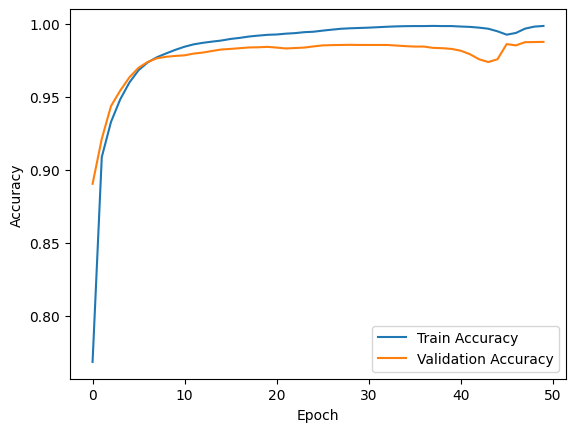

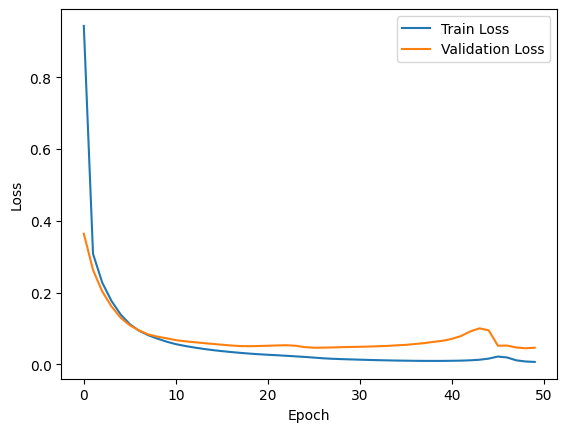

In [15]:
# Define model
model = tf.keras.Sequential([

            tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),

            tf.keras.layers.BatchNormalization(),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units=128,activation='relu') ,
            tf.keras.layers.Dropout(0.5),

            tf.keras.layers.Dense(units=10 ,activation= 'softmax')
        ])

# Set hyperparameters
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
epochs = 50
split_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(2500)

# Initialisation des listes pour le suivi de l'évolution
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training here
for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    for x_batch, y_batch in split_ds:
        with tf.GradientTape() as tape:
            predictions = model(x_batch)
            loss = loss_function(y_batch, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Suivi de l'évolution sur le jeu d'entraînement
        epoch_loss_avg.update_state(loss)
        epoch_accuracy.update_state(y_batch, predictions)

    # Mise a jour des listes sur le jeu d'entrainement
    train_losses.append(epoch_loss_avg.result().numpy())
    train_accuracies.append(epoch_accuracy.result().numpy())

    # Évaluation sur le jeu de validation
    val_predictions = model(x_val)
    val_loss = loss_function(y_val, val_predictions)
    val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()(y_val, val_predictions)

    # Mise a jour des listes sur le jeu de validation
    val_losses.append(val_loss.numpy())
    val_accuracies.append(val_accuracy.numpy())

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]}, Train Accuracy: {train_accuracies[-1]}, Validation Loss: {val_losses[-1]}, Validation Accuracy: {val_accuracies[-1]}")


# Plot training history
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
test_predictions = model(x_val)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()(y_val, test_predictions)
print(test_accuracy)

tf.Tensor(0.9876, shape=(), dtype=float32)


---
# Préparation des données Fashion MNIST

Vous allez utiliser le jeu de données Fashion MNIST qui contient des images de vétements, le but va être de définir un CNN qui va apprendre à reconnaître et correctement classifier les images.

Objectifs principaux :
- Définir une architecture et des hyper-paramètres adaptés
- Obtenir 90% d'accuracy sur le jeu de test

Objectifs secondaires :
- Entraînement en mini-batches
- Suivi de l'évolution de la loss et de l'accuracy sur le jeu d'entrainement sur un graph
- Suivi de l'évolution de la loss et de l'accuracy sur le jeu de validation sur un graph
- Utilisation de batch-normalizations
- Utilisation d'un dropout
- Rendre générique la phase d'entrainement du modèle afin de limiter les copier-collers des parties précédentes

In [17]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0
# Add channel dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
# Split train val
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

4422102/4422102 [==============================] - 0s 0us/step


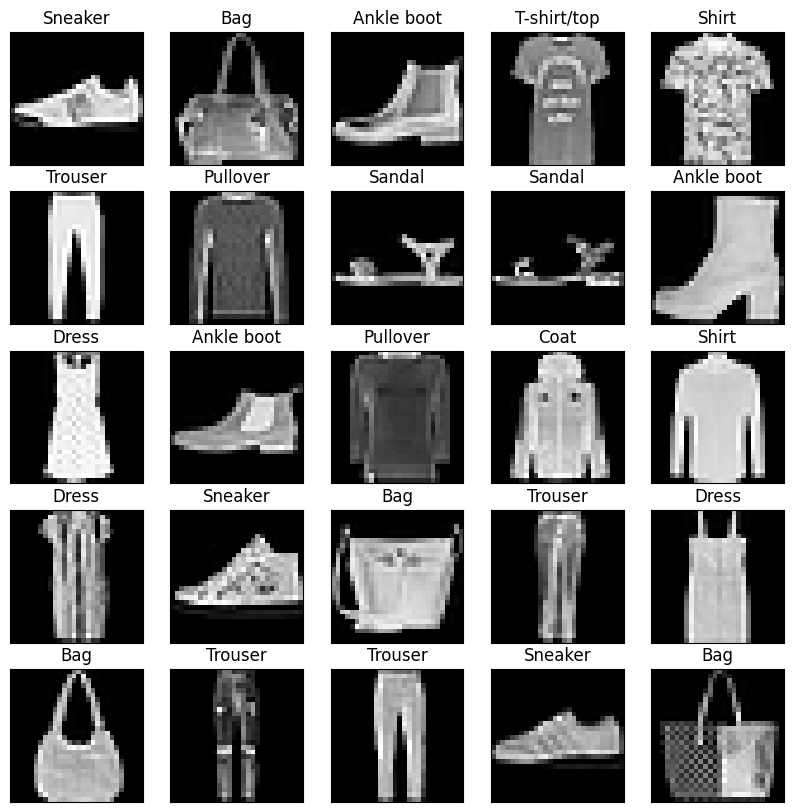

In [18]:
# Plot grid with first 25 training images with their corresponding label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(class_names[y_train[i]])
plt.show()

In [19]:
layers = [
            tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units=128,activation='relu') ,
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(units=10 ,activation= 'softmax')
        ]

Epoch 1/50, Train Loss: 1.0516376495361328, Train Accuracy: 0.6652708053588867, Validation Loss: 0.6331987380981445, Validation Accuracy: 0.7741666436195374
Epoch 2/50, Train Loss: 0.5331201553344727, Train Accuracy: 0.8141666650772095, Validation Loss: 0.5140746831893921, Validation Accuracy: 0.815583348274231
Epoch 3/50, Train Loss: 0.45088210701942444, Train Accuracy: 0.8426874876022339, Validation Loss: 0.43135127425193787, Validation Accuracy: 0.8522499799728394
Epoch 4/50, Train Loss: 0.4082767367362976, Train Accuracy: 0.8575416803359985, Validation Loss: 0.3985252380371094, Validation Accuracy: 0.8634999990463257
Epoch 5/50, Train Loss: 0.3791080415248871, Train Accuracy: 0.867479145526886, Validation Loss: 0.381985604763031, Validation Accuracy: 0.8681666851043701
Epoch 6/50, Train Loss: 0.35696250200271606, Train Accuracy: 0.8759166598320007, Validation Loss: 0.3657694458961487, Validation Accuracy: 0.8714166879653931
Epoch 7/50, Train Loss: 0.3391381800174713, Train Accuracy

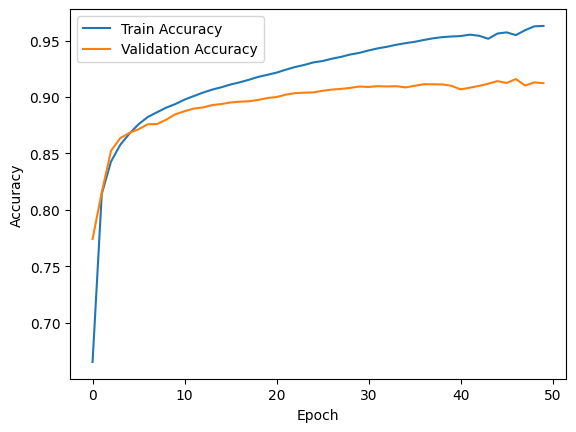

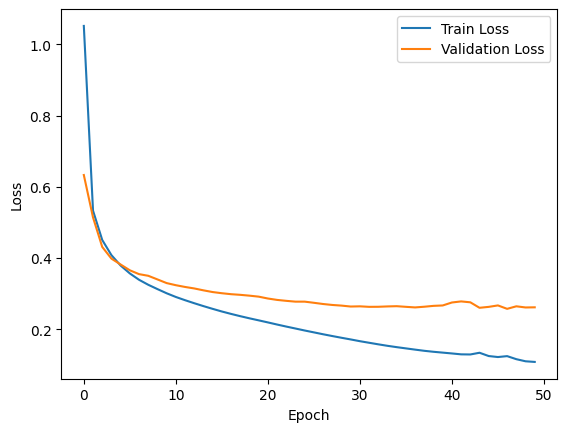

In [20]:
# Define model
model = tf.keras.Sequential(layers)

# Set hyperparameters
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
epochs = 50
nb_batches = 2500

# Training here
split_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(nb_batches)

# Initialisation des listes pour le suivi de l'évolution
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training with validation data
for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    for x_batch, y_batch in split_ds:
        with tf.GradientTape() as tape:
            predictions = model(x_batch)
            loss = loss_function(y_batch, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        epoch_loss_avg.update_state(loss)
        epoch_accuracy.update_state(y_batch, predictions)

    # Suivi de l'évolution sur le jeu d'entraînement
    train_losses.append(epoch_loss_avg.result().numpy())
    train_accuracies.append(epoch_accuracy.result().numpy())

    # Évaluation sur le jeu de validation
    val_predictions = model(x_val)
    val_loss = loss_function(y_val, val_predictions)
    val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()(y_val, val_predictions)

    # Suivi de l'évolution sur le jeu de validation
    val_losses.append(val_loss.numpy())
    val_accuracies.append(val_accuracy.numpy())

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]}, Train Accuracy: {train_accuracies[-1]}, Validation Loss: {val_losses[-1]}, Validation Accuracy: {val_accuracies[-1]}")

# Plot training history
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
predictions = model(x_test)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()(y_test, predictions)
print(test_accuracy)

tf.Tensor(0.9085, shape=(), dtype=float32)


Si l'apprentissage ci-dessus s'est bien passé l'executions des 2 cellules de code suivantes devraient vous afficher respectivement les 25 premières images de test avec le label prédit et le label réel pour chaque et les 40 premières images de test avec les probabilités émisent par le modèle pour chacune des classes.

La variable 'predictions' doit contenir les prédictions obtenus sur le jeu de test.

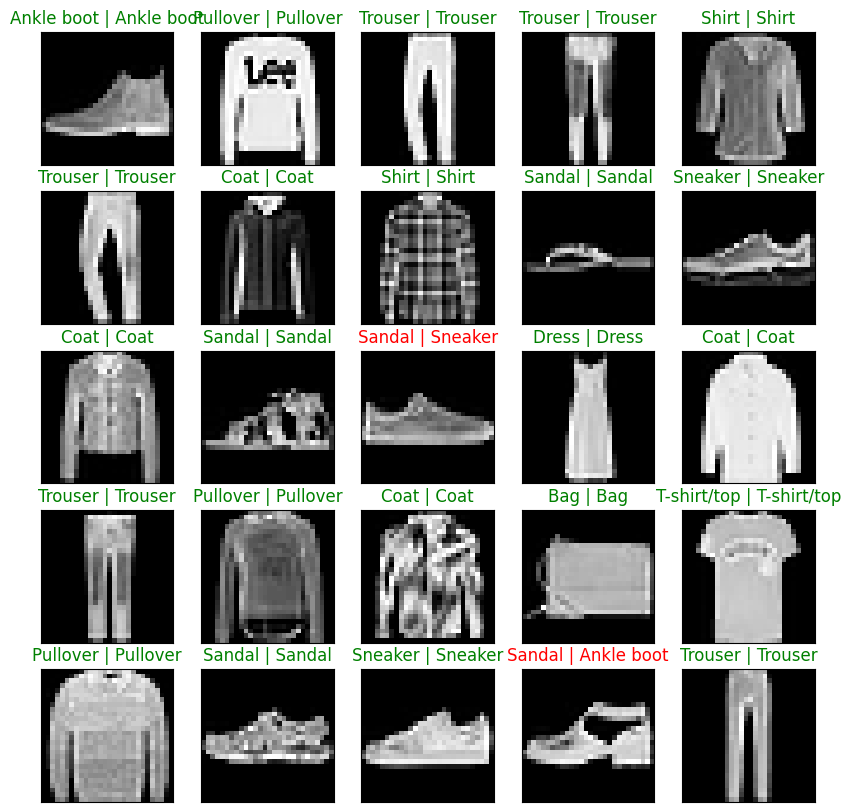

In [22]:
# Plot grid with first 25 test images with their predicted and true label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    pred = predictions[i].numpy().argmax()
    true = y_test[i]
    color = 'green' if pred == true else 'red'
    plt.title(f'{class_names[pred]} | {class_names[true]}', color=color)
plt.show()

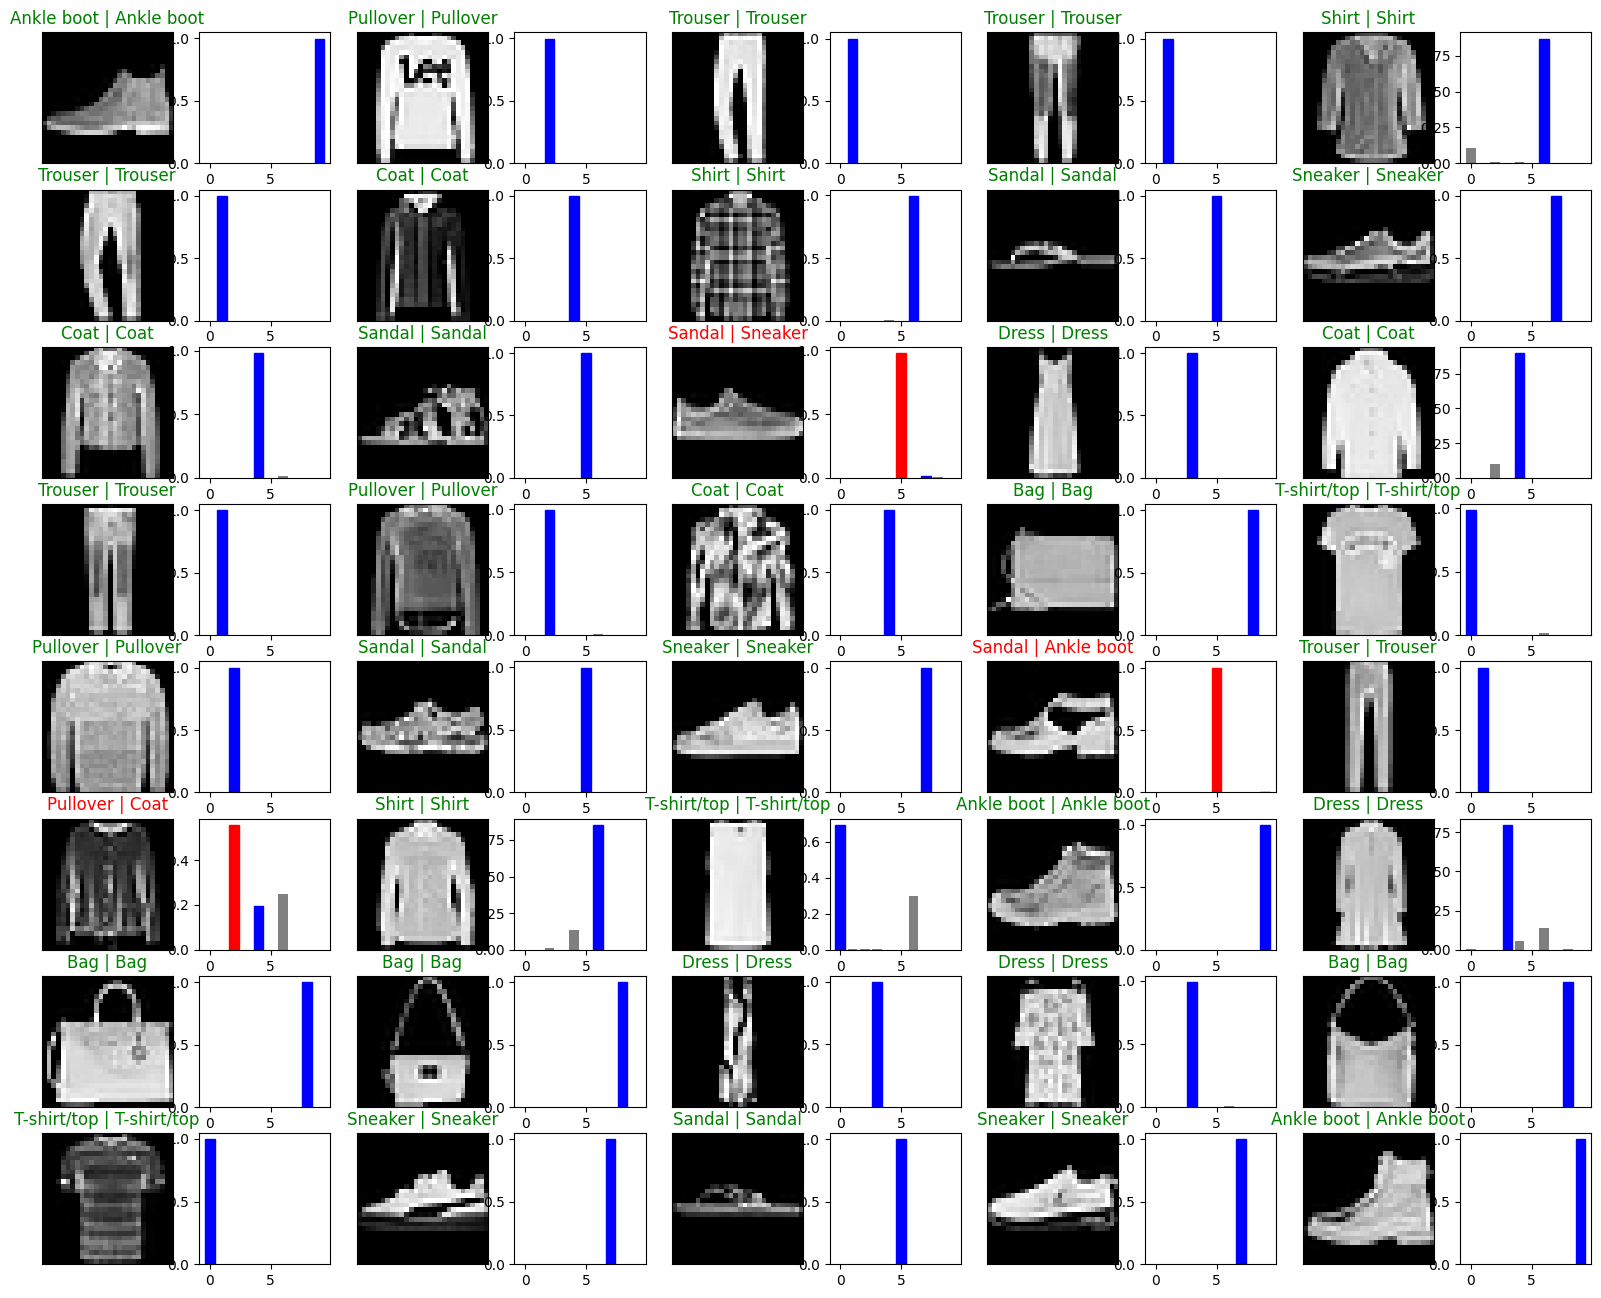

In [23]:
# Plot grid with first 40 test images with the model probabilities
plt.figure(figsize=(20, 16))
for i in range(40):
    plt.subplot(8, 10, (i*2)+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    pred = predictions[i].numpy().argmax()
    true = y_test[i]
    color = 'green' if pred == true else 'red'
    plt.title(f'{class_names[pred]} | {class_names[true]}', color=color)
    plt.subplot(8, 10, (i*2)+2)
    barplt = plt.bar(list(range(len(class_names))), predictions[i].numpy(),
                     color='gray')
    barplt[pred].set_color('red')
    barplt[true].set_color('blue')
plt.show()